In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np 
from statsmodels.iolib.summary2 import summary_col

In [2]:
url = "https://raw.githubusercontent.com/jesoto/1REI05/main/Reports/data/acemoglu_2001.csv"
base = pd.read_csv(url)
base.head()

,longname,shortnam,logmort0,risk,loggdp,campaign,source0,slave,latitude,neoeuro,...,logmortjam,logmortcap250,logmortjam250,wandcafrica,malfal94,wacacontested,mortnaval2250,logmortnaval2250,mortnaval1250,logmortnaval1250
0,Bangladesh,BGD,4.268438,5.140000,6.88,1,1,0,0.2667,0,...,4.268438,4.268438,4.268438,0,0.12008,0,71.410004,4.268438,71.410004,4.268438
1,Canada,CAN,2.778819,9.729999,9.99,0,1,0,0.6667,1,...,2.778819,2.778819,2.778819,0,0.00000,0,16.100000,2.778819,16.100000,2.778819
2,Congo,COG,5.480639,4.680000,7.42,0,1,1,0.0111,0,...,5.480639,5.480639,5.480639,1,0.95000,0,240.000000,5.480639,240.000000,5.480639
3,Algeria,DZA,4.359270,6.500000,8.39,1,1,0,0.3111,0,...,4.359270,4.359270,4.359270,0,0.00000,0,78.199997,4.359270,78.199997,4.359270
4,Egypt,EGY,4.216562,6.770000,7.95,1,1,0,0.3000,0,...,4.216562,4.216562,4.216562,0,0.00000,0,67.800003,4.216562,67.800003,4.216562


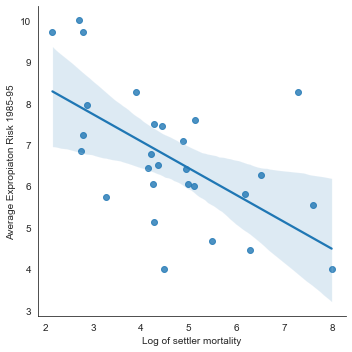

In [3]:
sns.set_style("white")
gr1 = sns.lmplot(x="logmort0", y="risk",
                     data=base, 
                     robust=True, 
                     palette='Set2',)
plt.xlabel("Log of settler mortality")
plt.ylabel("Average Expropiaton Risk 1985-95")
plt.show()

Based on the graphic, we can highlight some patterns as the following. Those countries that showed higher log settler mortality are the poorest nowadays, in other words, the current richer countries are those that presented lowest mortality rate. As the author developed in the paper, it might be because of the institution that were delveloped in that time based on the settlement. In this case, those who present higher log of settle mortality did not develoved institutions that respect property rights.

In [4]:
url1 = "https://raw.githubusercontent.com/jesoto/1REI05/main/Reports/data/acemoglu_2001_regression.csv"
base1 = pd.read_csv(url1)
base1.head()

,shortnam,africa,lat_abst,avexpr,logpgp95,other,asia,loghjypl,baseco
0,AFG,0,0.366667,NaN,NaN,0,1,NaN,NaN
1,AGO,1,0.136667,5.363637,7.770645,0,0,-3.411248,1.0
2,ARE,0,0.266667,7.181818,9.804219,0,1,NaN,NaN
3,ARG,0,0.377778,6.386363,9.133459,0,0,-0.872274,1.0
4,ARM,0,0.444444,NaN,7.682482,0,1,NaN,NaN


In [5]:
mod1= 'logpgp95 ~ avexpr'
result1 = smf.ols(mod1, data=base1).fit(cov_type='HC1')
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     334.8
Date:                Sat, 07 May 2022   Prob (F-statistic):           5.14e-35
Time:                        17:41:37   Log-Likelihood:                -119.71
No. Observations:                 111   AIC:                             243.4
Df Residuals:                     109   BIC:                             248.8
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6261      0.241     19.222      0.0

In [6]:
mod2= 'logpgp95 ~ avexpr + baseco==1'
result2 = smf.ols(mod2, data=base1).fit(cov_type='HC1')
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sat, 07 May 2022   Prob (F-statistic):           1.19e-35
Time:                        17:41:37   Log-Likelihood:                -119.54
No. Observations:                 111   AIC:                             245.1
Df Residuals:                     108   BIC:                             253.2
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.7700    

In [7]:
mod3= 'logpgp95 ~ avexpr + lat_abst'
result3 = smf.ols(mod3, data=base1).fit(cov_type='HC1')
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     183.9
Date:                Sat, 07 May 2022   Prob (F-statistic):           1.66e-35
Time:                        17:41:37   Log-Likelihood:                -118.09
No. Observations:                 111   AIC:                             242.2
Df Residuals:                     108   BIC:                             250.3
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8729      0.281     17.357      0.0

In [8]:
mod4= 'logpgp95 ~ avexpr + lat_abst+africa + asia + other'
result4 = smf.ols(mod4, data=base1).fit(cov_type='HC1')
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     97.09
Date:                Sat, 07 May 2022   Prob (F-statistic):           9.39e-38
Time:                        17:41:37   Log-Likelihood:                -102.45
No. Observations:                 111   AIC:                             216.9
Df Residuals:                     105   BIC:                             233.2
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8511      0.293     19.936      0.0

In [9]:
mod5= 'logpgp95 ~ avexpr + lat_abst+ baseco ==1'
result5 = smf.ols(mod5, data=base1).fit(cov_type='HC1')
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     124.5
Date:                Sat, 07 May 2022   Prob (F-statistic):           9.29e-35
Time:                        17:41:37   Log-Likelihood:                -118.06
No. Observations:                 111   AIC:                             244.1
Df Residuals:                     107   BIC:                             255.0
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.8199    

In [10]:
mod6= 'logpgp95 ~ avexpr + lat_abst+ africa + asia + other + baseco ==1'
result6 = smf.ols(mod6, data=base1).fit(cov_type='HC1')
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     80.49
Date:                Sat, 07 May 2022   Prob (F-statistic):           8.10e-37
Time:                        17:41:37   Log-Likelihood:                -102.43
No. Observations:                 111   AIC:                             218.9
Df Residuals:                     104   BIC:                             237.8
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.8072    

In [11]:
table = summary_col([result1,result2,result3,result4,result5,result6],stars=True)
print(table)


                    logpgp95 I logpgp95 II logpgp95 III logpgp95 IIII logpgp95 IIIII logpgp95 IIIIII
----------------------------------------------------------------------------------------------------
Intercept           4.6261***  4.7700***   4.8729***    5.8511***     4.8199***      5.8072***      
                    (0.2407)   (0.4288)    (0.2808)     (0.2935)      (0.4229)       (0.4312)       
R-squared           0.6113     0.6125      0.6225       0.7152        0.6227         0.7153         
R-squared Adj.      0.6078     0.6053      0.6155       0.7016        0.6121         0.6989         
africa                                                  -0.9164***                   -0.9141***     
                                                        (0.1541)                     (0.1540)       
asia                                                    -0.1531                      -0.1415        
                                                        (0.1805)                     (0.20

As we can see based on the R-squared adjust of the models, the fourth one have the higher explain capabilities of the variaton in logpgp95(70%). However, it is important to highlight also the first model as it can explain 60% of the variation of the depend variable with just one independent variable: avexpr. Based on that, we can said that is this last variable which can predict better the variation of logpgp95. 

In [12]:
mod7= 'loghjypl ~ avexpr'
result7 = smf.ols(mod7, data=base1).fit(cov_type='HC1')
print(result7.summary())

                            OLS Regression Results                            
Dep. Variable:               loghjypl   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     230.6
Date:                Sat, 07 May 2022   Prob (F-statistic):           2.37e-28
Time:                        17:41:37   Log-Likelihood:                -115.77
No. Observations:                 108   AIC:                             235.5
Df Residuals:                     106   BIC:                             240.9
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.8276      0.243    -19.858      0.0

In [13]:
mod8= 'loghjypl ~ avexpr + baseco ==1'
result8 = smf.ols(mod8, data=base1).fit(cov_type='HC1')
print(result7.summary())

                            OLS Regression Results                            
Dep. Variable:               loghjypl   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     230.6
Date:                Sat, 07 May 2022   Prob (F-statistic):           2.37e-28
Time:                        17:41:37   Log-Likelihood:                -115.77
No. Observations:                 108   AIC:                             235.5
Df Residuals:                     106   BIC:                             240.9
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.8276      0.243    -19.858      0.0

In [15]:
table1 = summary_col([result7,result8,],stars=True)
print(table1)


                    loghjypl I loghjypl II
------------------------------------------
Intercept           -4.8276*** -4.7790*** 
                    (0.2431)   (0.3923)   
R-squared           0.5541     0.5543     
R-squared Adj.      0.5499     0.5458     
avexpr              0.4462***  0.4422***  
                    (0.0294)   (0.0404)   
baseco == 1[T.True]            -0.0357    
                               (0.1758)   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


As we can see in the table, just the variable "avexpr" is estadically significant. Because of that, I considered that the model7 is better even is it have a little lower R-squared adj. 

In [14]:
#Reporte

Jaramillo, in his research, sought to answer the question of what are the effects of variations in the minimum wage in the labor market, specifically, its effects on employment and income. Therefore, he focused his research on the increases in the minimum wage in Peru in the decade of 2000-2010. And, after different tests, he concluded that these increases were not effective for the purposes of equity and social inclusion with which such public policy is carried out.
Jaramillo's work presents an extensive review of the literature of studies on the effects of the minimum living wage or minimum salary in the labor market. From this, he finds a great pattern of reality in our region, such as the inability to enforce new policies or laws. Likewise, contrary to the myth that Peru is at the bottom of the minimum wages in the region, it shows that in reality the Peruvian minimum wage is at an average level in the region using more precise measurements such as the conversion to dollars at parity of purchasing power
The study differs from other investigations by carrying out a cross-sectional analysis of all the variations of the minimum vital remuneration in Peru in the aforementioned decade, unlike the analyzes focused on a specific rise that has normally been seen in the literature.This allows us to see that while the minimum wage has been increasing, the effects on the formal sector have been reduced. In the same way, he innovates by adding the informal sector to the analysis, which, taking into account the levels of informality in Peru, is a great contribution to the creation and application of public policies.
On the other hand, rather than find weakness in the research I find problems due to the nature of the minimum living wage in Peru. Just as the author recognizes and draws attention, this seems to be designed by and for Metropolitan Lima: this policy is criticized since it does not take into account the great heterogeneity present between the regions, making it difficult to achieve representative results for the country.
Finally, and based on the above, this study could be used to promote an analysis of what should be a correct minimum wage in the different regions of the country, taking into account the type of activity, geography, cost of living and other pertinent variables. Likewise, it would be very useful to study other types of effects that the minimum wage may have. For example, it could be seen if the increases in the minimum wage have effects on the state presence perceived by Peruvians, trust in institutions or other types of effects.
